In [2]:
#Imports
import tensorflow as tf
import cv2 as cv
import pandas as pd
import numpy as np

import  os
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.16.1


In [3]:
print(tf.keras.__version__)

3.3.3


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  0


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [6]:
data_dir = 'PokemonData'

os.listdir(os.path.join(data_dir))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'PokemonData'

In [9]:
PokemonArray = ['Abra',
 'Aerodactyl',
 'Alakazam',
 'Alolan Sandslash',
 'Arbok',
 'Arcanine',
 'Articuno',
 'Beedrill',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Butterfree',
 'Caterpie',
 'Chansey',
 'Charizard',
 'Charmander',
 'Charmeleon',
 'Clefable',
 'Clefairy',
 'Cloyster',
 'Cubone',
 'Dewgong',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Doduo',
 'Dragonair',
 'Dragonite',
 'Dratini',
 'Drowzee',
 'Dugtrio',
 'Eevee',
 'Ekans',
 'Electabuzz',
 'Electrode',
 'Exeggcute',
 'Exeggutor',
 'Farfetchd',
 'Fearow',
 'Flareon',
 'Gastly',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Goldeen',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Growlithe',
 'Gyarados',
 'Haunter',
 'Hitmonchan',
 'Hitmonlee',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx',
 'Kabuto',
 'Kabutops',
 'Kadabra',
 'Kakuna',
 'Kangaskhan',
 'Kingler',
 'Koffing',
 'Krabby',
 'Lapras',
 'Lickitung',
 'Machamp',
 'Machoke',
 'Machop',
 'Magikarp',
 'Magmar',
 'Magnemite',
 'Magneton',
 'Mankey',
 'Marowak',
 'Meowth',
 'Metapod',
 'Mew',
 'Mewtwo',
 'Moltres',
 'MrMime',
 'Muk',
 'Nidoking',
 'Nidoqueen',
 'Nidorina',
 'Nidorino',
 'Ninetales',
 'Oddish',
 'Omanyte',
 'Omastar',
 'Onix',
 'Paras',
 'Parasect',
 'Persian',
 'Pidgeot',
 'Pidgeotto',
 'Pidgey',
 'Pikachu',
 'Pinsir',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Ponyta',
 'Porygon',
 'Primeape',
 'Psyduck',
 'Raichu',
 'Rapidash',
 'Raticate',
 'Rattata',
 'Rhydon',
 'Rhyhorn',
 'Sandshrew',
 'Sandslash',
 'Scyther',
 'Seadra',
 'Seaking',
 'Seel',
 'Shellder',
 'Slowbro',
 'Slowpoke',
 'Snorlax',
 'Spearow',
 'Squirtle',
 'Starmie',
 'Staryu',
 'Tangela',
 'Tauros',
 'Tentacool',
 'Tentacruel',
 'Vaporeon',
 'Venomoth',
 'Venonat',
 'Venusaur',
 'Victreebel',
 'Vileplume',
 'Voltorb',
 'Vulpix',
 'Wartortle',
 'Weedle',
 'Weepinbell',
 'Weezing',
 'Wigglytuff',
 'Zapdos',
 'Zubat']

# Load Data

In [10]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 6820 files belonging to 150 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
#images as numpy array
batch[0].shape
#1- batch[0] is images
#batch[1] is labels

(32, 256, 256, 3)

In [15]:


batch[1]


array([127, 108,  75, 124,  65, 138,  77,  37,  51, 120, 126,  92, 126,
       116, 134,  99, 100,  19,  60,  69,  40,  47,  64,  67, 139, 100,
        34,  96,  25,  79,  72, 131])

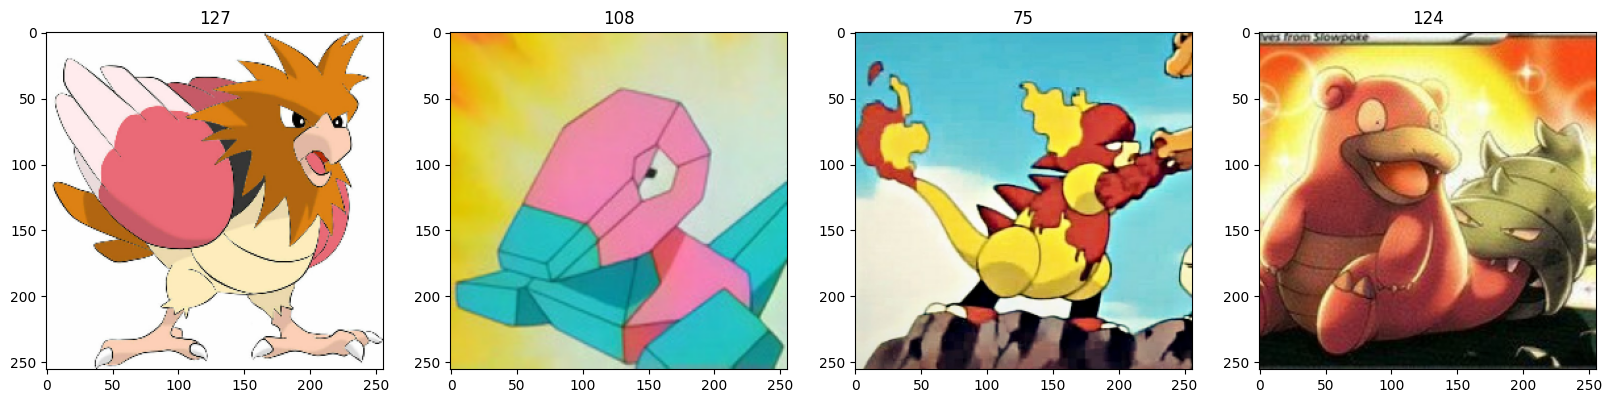

In [16]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing Data

In [17]:
#map allows us to do a transformation as we load a batch we perform a transformation on y

data = data.map(lambda x,y:(x/255,y))



In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

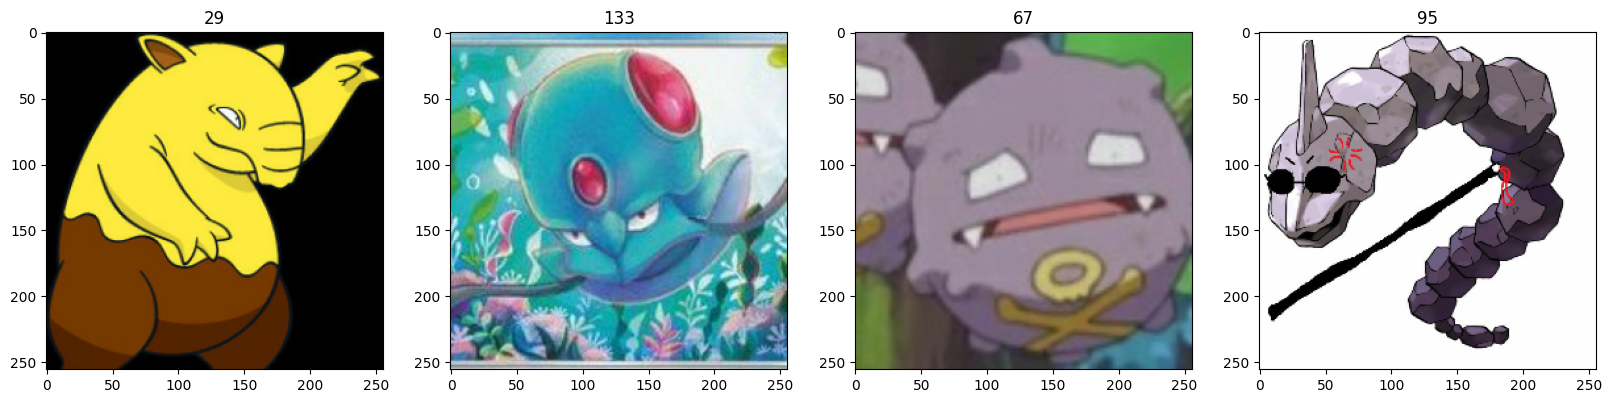

In [20]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
for images, labels in data.take(1):
    print(images.shape)  # Should print (batch_size, 256, 256, 3)



(32, 256, 256, 3)


# Split Data

In [23]:
len(data)

214

In [24]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)+1
test_size = int(len(data)*.1)+1



In [25]:
train_size+val_size+test_size

214

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


# Deep Neural Network


In [25]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout,Dense

In [26]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    tf.keras.layers.RandomRotation(0.2),                    # Rotate images by up to 20%
    tf.keras.layers.RandomZoom(0.2),                        # Zoom images in or out by up to 20%
    tf.keras.layers.RandomContrast(0.2),                    # Adjust contrast by up to 20%
    tf.keras.layers.RandomTranslation(0.2, 0.2)             # Translate images by up to 20% horizontally and vertically
])

In [27]:
model_2 = Sequential()

In [30]:
model_2.add(data_augmentation)

model_2.add(Conv2D(8,(3,3),1,activation='relu',input_shape=(256,256,3)))
model_2.add(MaxPooling2D())
model_2.add(tf.keras.layers.BatchNormalization())
model_2.add(Conv2D(16,(3,3),1,activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(tf.keras.layers.BatchNormalization())

model_2.add(Conv2D(32,(3,3),1,activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(tf.keras.layers.BatchNormalization())

model_2.add(Conv2D(64,(3,3),1,activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(tf.keras.layers.BatchNormalization())

model_2.add(Conv2D(64,(3,3),1,activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(tf.keras.layers.BatchNormalization())


model_2.add(Flatten())

model_2.add(Dense(512,activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.5))

model_2.add(Dense(200,activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.5))





model_2.add(Dense(151,activation='softmax'))


In [31]:
model_2.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [32]:
logdir = 'log'

In [33]:
import tensorboard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model_2.fit(data,epochs=15,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/15
214/214 [==============================] - 256s 1s/step - loss: 5.2463 - accuracy: 0.0079 - val_loss: 5.0145 - val_accuracy: 0.0102
Epoch 2/15
214/214 [==============================] - 254s 1s/step - loss: 5.0093 - accuracy: 0.0101 - val_loss: 4.7302 - val_accuracy: 0.0276
Epoch 3/15
214/214 [==============================] - 239s 1s/step - loss: 4.8461 - accuracy: 0.0221 - val_loss: 4.8950 - val_accuracy: 0.0240
Epoch 4/15
214/214 [==============================] - 233s 1s/step - loss: 4.7200 - accuracy: 0.0287 - val_loss: 4.3460 - val_accuracy: 0.0451
Epoch 5/15
214/214 [==============================] - 224s 1s/step - loss: 4.5914 - accuracy: 0.0271 - val_loss: 4.0296 - val_accuracy: 0.0647
Epoch 6/15
214/214 [==============================] - 234s 1s/step - loss: 4.4723 - accuracy: 0.0323 - val_loss: 3.8844 - val_accuracy: 0.0814
Epoch 7/15
184/214 [========================>.....] - ETA: 32s - loss: 4.3952 - accuracy: 0.0392

KeyboardInterrupt: 

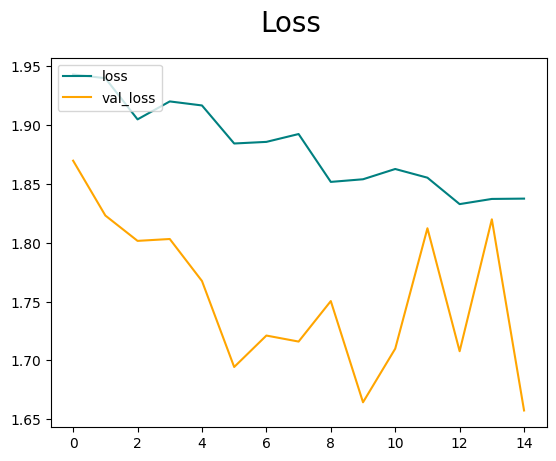

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()


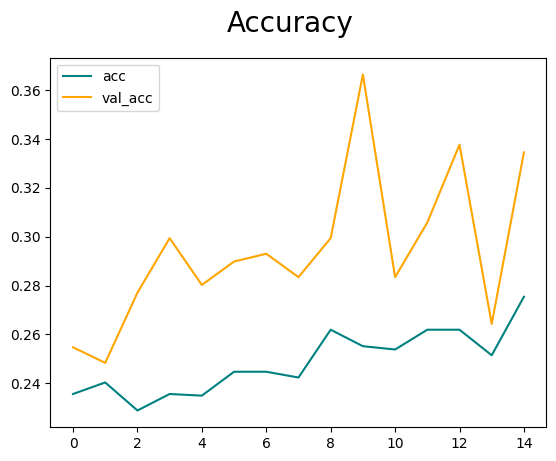

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='acc')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_acc')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()


# Evaluataing Performance

In [ ]:
import cv2

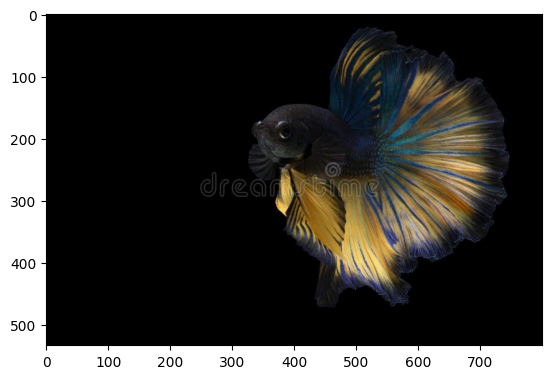

In [50]:
img = cv2.imread(r"D:\AI Classifier 30 Fish\Images\Test\3 Betta\betta-fish-siamese-fighting-fish-betta-splendens-betta-fish-.jpg")
img = cv.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

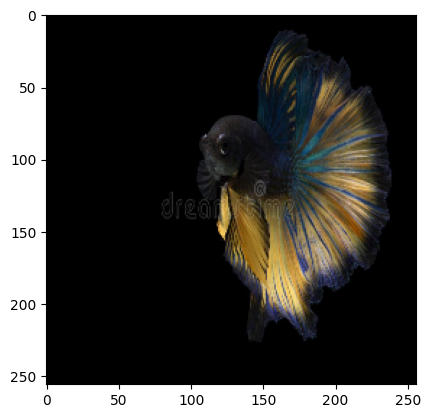

In [51]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model_2.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 38ms/step


In [53]:
print(np.argmax(yhat))

8


In [ ]:
Fisharray=['Abramis brama',
 'Acipenseridae',
 'Anguilla anguilla',
 'Aspius aspius',
 'Barbus barbus',
 'Blicca bjoerkna',
 'Carassius carassius',
 'Carassius gibelio',
 'Ctenopharyngodon idella',
 'Cyprinus carpio',
 'Esox lucius',
 'Gasterosteus aculeatus',
 'Gobio gobio',
 'Gymnocephalus cernuus',
 'Lepomis gibbosus',
 'Leuciscus cephalus',
 'Leuciscus idus',
 'Leuciscus leuciscus',
 'Neogobius fluviatilis',
 'Neogobius kessleri',
 'Neogobius melanostomus',
 'Perca fluviatilis',
 'Rhodeus amarus',
 'Rutilus rutilus',
 'Salmo trutta subsp. fario',
 'Sander lucioperca',
 'Scardinius erythrophthalmus',
 'Silurus glanis',
 'Tinca tinca',
 'Vimba vimba']


In [55]:
print(Fisharray[np.argmax(yhat[0])])

Eel


# Saving Model


In [34]:
print(tf.keras.__version__)

3.6.0


In [30]:
new_model = tf.keras.models.load_model(r'D:\Original Pokemon 151 Image Classifier\my_model.keras')
# model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        51,400 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,365,559 (16.65 MB)

 Trainable params: 1,455,063 (5.55 MB)

 Non-trainable params: 368 (1.44 KB)

 Optimizer params: 2,910,128 (11.10 MB)

In [31]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = tf.keras.metrics.SparseCategoricalAccuracy()
bacc = tf.keras.metrics.SparseCategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = new_model.predict(X)
    # y_hat = model.predict(X)

    acc.update_state(y,yhat)
    # bacc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


In [32]:
print(acc.result().numpy())

0.7529586


# Steamlit implementation

In [1]:
array = ['Golbat',
 'Beedrill',
 'Caterpie',
 'Clefable',
 'Raichu',
 'Sandslash',
 'Metapod',
 'Drowzee',
 'Oddish',
 'Charizard',
 'Tauros',
 'Ponyta',
 'Primeape',
 'Spearow',
 'Mankey',
 'Poliwag',
 'Krabby',
 'Rattata',
 'Tentacruel',
 'Graveler',
 'Koffing',
 'Zapdos',
 'Articuno',
 'Psyduck',
 'Bellsprout',
 'Lapras',
 'Butterfree',
 'Weezing',
 'Abra',
 'Muk',
 'Cloyster',
 'Porygon',
 'Flareon',
 'Jigglypuff',
 'Raticate',
 'Venusaur',
 'Dewgong',
 'Horsea',
 'Rhydon',
 'Omanyte',
 'Exeggcute',
 'Kabuto',
 'Ditto',
 'Growlithe',
 'Mew',
 'Electrode',
 'Vileplume',
 'Seaking',
 'Exeggutor',
 'Electabuzz',
 'Chansey',
 'Magmar',
 'Haunter',
 'Ninetales',
 'Clefairy',
 'Nidoran-m',
 'Gyarados',
 'Tangela',
 'Marowak',
 'Snorlax',
 'Nidoqueen',
 'Hitmonchan',
 'Ekans',
 'Sandshrew',
 'Jolteon',
 'Kabutops',
 'Lickitung',
 'Pidgeotto',
 'Shellder',
 'Slowpoke',
 'Pikachu',
 'Poliwrath',
 'Fearow',
 'Magnemite',
 'Hitmonlee',
 'Machoke',
 'Poliwhirl',
 'Magneton',
 'Diglett',
 'Venonat',
 'Kakuna',
 'Eevee',
 'Ivysaur',
 'Doduo',
 'Wigglytuff',
 'Goldeen',
 'Alakazam',
 'Starmie',
 'Grimer',
 'Pinsir',
 'Tentacool',
 'Mewtwo',
 'Dodrio',
 'Kangaskhan',
 'Arcanine',
 'Dratini',
 'Aerodactyl',
 'Gastly',
 'Geodude',
 'Magikarp',
 'Zubat',
 'Paras',
 'Machamp',
 'Victreebel',
 'Wartortle',
 'Omastar',
 'Meowth',
 'Nidorina',
 'Bulbasaur',
 'Farfetchd',
 'Nidoran-f',
 'Rapidash',
 'Seel',
 'Blastoise',
 'Venomoth',
 'Hypno',
 'Golduck',
 'Nidoking',
 'Vaporeon',
 'Dragonite',
 'Onix',
 'Pidgeot',
 'Machop',
 'Moltres',
 'Scyther',
 'MrMime',
 'Cubone',
 'Gengar',
 'Kingler',
 'Dugtrio',
 'Gloom',
 'Parasect',
 'Persian',
 'Golem',
 'Seadra',
 'Squirtle',
 'Nidorino',
 'Charmander',
 'Jynx',
 'Dragonair',
 'Arbok',
 'Weedle',
 'Pidgey',
 'Kadabra',
 'Rhyhorn',
 'Weepinbell',
 'Charmeleon',
 'Staryu',
 'Voltorb',
 'Slowbro',
 'Vulpix']

In [2]:
print(array)

['Golbat', 'Beedrill', 'Caterpie', 'Clefable', 'Raichu', 'Sandslash', 'Metapod', 'Drowzee', 'Oddish', 'Charizard', 'Tauros', 'Ponyta', 'Primeape', 'Spearow', 'Mankey', 'Poliwag', 'Krabby', 'Rattata', 'Tentacruel', 'Graveler', 'Koffing', 'Zapdos', 'Articuno', 'Psyduck', 'Bellsprout', 'Lapras', 'Butterfree', 'Weezing', 'Abra', 'Muk', 'Cloyster', 'Porygon', 'Flareon', 'Jigglypuff', 'Raticate', 'Venusaur', 'Dewgong', 'Horsea', 'Rhydon', 'Omanyte', 'Exeggcute', 'Kabuto', 'Ditto', 'Growlithe', 'Mew', 'Electrode', 'Vileplume', 'Seaking', 'Exeggutor', 'Electabuzz', 'Chansey', 'Magmar', 'Haunter', 'Ninetales', 'Clefairy', 'Nidoran-m', 'Gyarados', 'Tangela', 'Marowak', 'Snorlax', 'Nidoqueen', 'Hitmonchan', 'Ekans', 'Sandshrew', 'Jolteon', 'Kabutops', 'Lickitung', 'Pidgeotto', 'Shellder', 'Slowpoke', 'Pikachu', 'Poliwrath', 'Fearow', 'Magnemite', 'Hitmonlee', 'Machoke', 'Poliwhirl', 'Magneton', 'Diglett', 'Venonat', 'Kakuna', 'Eevee', 'Ivysaur', 'Doduo', 'Wigglytuff', 'Goldeen', 'Alakazam', 'Star

In [ ]:
array.sort()

In [5]:
print(array)

['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidoran-f

In [3]:
model = tf.keras.models.load_model('D:\Original Pokemon 151 Image Classifier\models\my_model11.keras')


In [11]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             

 Total params: 1,768,391 (6.75 MB)

 Trainable params: 589,239 (2.25 MB)

 Non-trainable params: 672 (2.62 KB)

 Optimizer params: 1,178,480 (4.50 MB)

None


In [10]:
from tensorflow.keras.utils import plot_model, model_to_dot
import pydot
# plot_model(model, to_file='model_flowchart.png', show_shapes=True, show_layer_names=True)
dot =model_to_dot(model,show_shapes=True, show_layer_names=True)

(graph,) = pydot.graph_from_dot_data(dot.to_string())

graph.write_png('model_architecture.png')